## Обработка Задчачи №336

Суть задачи:
В эксперементе мы проверяем зависимость ЭДС индукции в разных катушках при: 

$$\frac{d\Phi}{dt} =const$$


Поле создаётся при помощи большого соленоида, параметры которого известны

### Функция считывания таблиц из файла нам понадобится целых 4 раза - поэтому я её и выделил в отдельную функцию:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def read_data(file_path):
    file = open(file_path, 'r')
     
    data = {}
    heads = []
     
    for head in file.readline().rstrip('\n').split("\t"):
         #print(head)
         heads.append(head)
         data.update({head : []})
    
    for i in range(0, len(heads)):
            data[heads[i]] = []
    
    for line in file:
        vals = line.split("\t")
        for i in range(0, len(vals)):
            #print(vals[i])
            data[heads[i]].append(float(vals[i]))
            
    return data
    
    file.close()

read_data организует текстовый документ в словарь так, что первая строчка является набором ключей этого словаря

### Теперь считаем данные катушек, они нам понадобятся во всех упражнениях:

In [2]:
coils_data = read_data("Data\coils.txt")
keys = coils_data.keys()
for key in keys:
    print(key, end="\t")
    print(coils_data[key])

No	[1.0, 2.0, 3.0, 4.0, 5.0]
D	[100.0, 80.0, 80.0, 80.0, 50.0]
N	[250.0, 250.0, 350.0, 150.0, 250.0]


### А также сразу считаем данные для остальных упражнений

In [3]:
ex1_data = read_data("Data\ex1.txt")
keys = ex1_data.keys()
for key in keys:
    print(key, end="\t")
    print(ex1_data[key])

No	[5.0, 2.0, 1.0]
D	[50.0, 80.0, 100.0]
dD	[5.0, 5.0, 5.0]
E(300)	[63.0, 141.0, 253.0]
E(500)	[106.0, 231.0, 412.0]
E(800)	[172.0, 366.0, 656.0]


In [4]:
ex2_data = read_data("Data\ex2.txt")
keys = ex2_data.keys()
for key in keys:
    print(key, end="\t")
    print(ex2_data[key])

No	[4.0, 2.0, 3.0]
N	[150.0, 250.0, 350.0]
E(300)	[96.0, 140.0, 181.0]
E(500)	[160.0, 231.0, 300.0]
E(800)	[252.0, 369.0, 460.0]


In [5]:
ex3_data = read_data("Data\ex3.txt")
keys = ex3_data.keys()
for key in keys:
    print(key, end="\t")
    print(ex3_data[key])

f	[100.0, 200.0, 300.0, 400.0, 500.0, 600.0, 700.0, 800.0, 900.0, 1000.0]
I`	[180.9, 360.0, 537.3, 712.9, 867.5, 1043.5, 1220.3, 1392.6, 1578.9, 1739.1]
N1E	[81.0, 163.0, 256.0, 337.0, 412.0, 497.0, 581.0, 647.0, 741.0, 806.0]
N2E	[44.0, 80.0, 138.0, 188.0, 231.0, 278.0, 325.0, 366.0, 412.0, 450.0]
N3E	[50.0, 113.0, 181.0, 241.0, 300.0, 359.0, 412.0, 459.0, 506.0, 563.0]
N4E	[30.0, 50.0, 94.0, 125.0, 156.0, 188.0, 219.0, 244.0, 272.0, 300.0]
N5E	[20.0, 32.0, 66.0, 88.0, 110.0, 128.0, 150.0, 172.0, 191.0, 213.0]
	[]


### Обработка первого упражнения

Построить зависимость $E, мВ$ от площади $S$ катушки при разных частотах

Вычисляем и добавляем в словарь погрешности измерения $E$

In [6]:
ex1_data.update({"dE(300)" : []})
ex1_data.update({"dE(500)" : []})
ex1_data.update({"dE(800)" : []})

for val in ex1_data["E(300)"]:
    ex1_data["dE(300)"].append( np.sqrt(9 + (0.05*val)*(0.05*val)) )
        
for val in ex1_data["E(500)"]:
    ex1_data["dE(500)"].append( np.sqrt(9 + (0.05*val)*(0.05*val)) )
        
for val in ex1_data["E(800)"]:
    ex1_data["dE(800)"].append( np.sqrt(9 + (0.05*val)*(0.05*val)) )

Пересчитываем $D$ в $S$

In [7]:
ex1_data.update({"S" : []})
ex1_data.update({"dS" : []})
    
for i in range(0, len(ex1_data["D"])):
    val = ex1_data["D"][i]
    dval = ex1_data["dD"][i]
    ex1_data["S"].append( 0.25 * np.pi * val * val )
    ex1_data["dS"].append( 0.5 * np.pi * val * dval )

Теперь создадим две функции:
Для записи в файл и Для построения и сохранения графиков

In [8]:
def to_file(file_path, keys, dic):
    file = open(file_path, "w")
    
    for key in keys:
        file.write(str(key) + "\t")
    file.write("\n")
    
    for i in range(0, len(dic[keys[0]])):
        for key in keys:
            file.write(str(dic[key][i]) + "\t")
        file.write("\n")   
    
    
    
    file.close()


def plot(dic, x_key, y_keys, lables, titles, filename):
    for i in range(0, len(y_keys)):
        #plt.plot(dic[x_key], dic[y_keys[i]], 'o--', linewidth=0.8, fontsize=14, label='$r=1.3$')
        plt.plot(dic[x_key], dic[y_keys[i]], 'o', linewidth=0.8, label=str(lables[i]))
        
    plt.xlabel(titles[0], fontsize=14)
    plt.ylabel(titles[1], fontsize=14)
    plt.title(titles[2], fontsize=12)
    
    plt.legend(loc=0, frameon=0, fontsize=8)
    
    plt.savefig(filename, dpi=300)
    plt.show()

Воспользуемся этими функциями для сохранения результатов

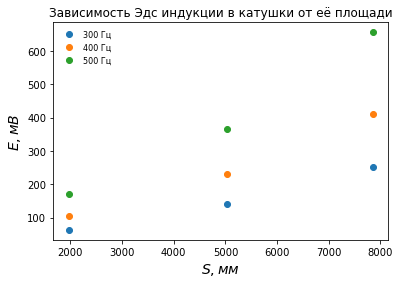

In [9]:
to_file("Result\ex1_res.txt", ["S", "dS", "E(300)", "dE(300)", "E(500)", "dE(500)", "E(800)", "dE(800)"], ex1_data)
plot(ex1_data, "S", ["E(300)", "E(500)", "E(800)"], ["300 Гц", "400 Гц", "500 Гц"], ["$S, мм$", "$E, мВ$", "Зависимость Эдс индукции в катушки от её площади"], "Result\ex1_gr1.pdf")

Видно, что $E$ линейно зависит от $S$, при разных частотах. Это сходится с теорией.

### Теперь перейдём ко второму упражнению
Построить зависимость $E, мВ$ от площади $N$ катушки при разных частотах

Делаем всё по аналогии...

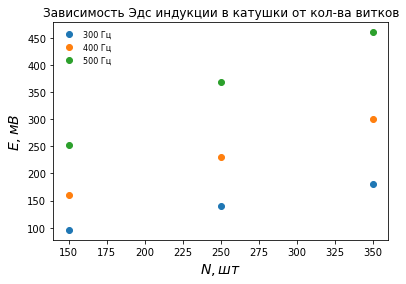

In [10]:
ex2_data.update({"dE(300)" : []})
ex2_data.update({"dE(500)" : []})
ex2_data.update({"dE(800)" : []})
    
    
for val in ex2_data["E(300)"]:
    ex2_data["dE(300)"].append( np.sqrt(9 + (0.05*val)*(0.05*val)) )
        
for val in ex2_data["E(500)"]:
    ex2_data["dE(500)"].append( np.sqrt(9 + (0.05*val)*(0.05*val)) )
        
for val in ex2_data["E(800)"]:
    ex2_data["dE(800)"].append( np.sqrt(9 + (0.05*val)*(0.05*val)) )
    
    
to_file("Result\ex2_res.txt", ["N", "E(300)", "dE(300)", "E(500)", "dE(500)", "E(800)", "dE(800)"], ex2_data)
plot(ex2_data, "N", ["E(300)", "E(500)", "E(800)"], ["300 Гц", "400 Гц", "500 Гц"], ["$N, шт$", "$E, мВ$", "Зависимость Эдс индукции в катушки от кол-ва витков"], "Result\ex2_gr1.pdf")

Опять видно прослеживается линейная зависимость, что сходится с теорией!

### Обработка 3-го упражнения

В этом упражнении мы измеряем $E$ от частоты $f$ всех 5-ти катушек

Первым делом расчитаем погрешности $dE$ для каждой катушки при каждой частоте:

In [11]:
ex3_data.update({"N1dE" :[]})
ex3_data.update({"N2dE" :[]})
ex3_data.update({"N3dE" :[]})
ex3_data.update({"N4dE" :[]})
ex3_data.update({"N5dE" :[]})
    
    
    
for val in ex3_data["N1E"]:
    ex3_data["N1dE"].append( np.sqrt(9 + (0.05*val)*(0.05*val)) )
        
for val in ex3_data["N2E"]:
    ex3_data["N2dE"].append( np.sqrt(9 + (0.05*val)*(0.05*val)) )
    
for val in ex3_data["N3E"]:
    ex3_data["N3dE"].append( np.sqrt(9 + (0.05*val)*(0.05*val)) )
    
for val in ex3_data["N4E"]:
    ex3_data["N4dE"].append( np.sqrt(9 + (0.05*val)*(0.05*val)) )
    
for val in ex3_data["N5E"]:
    ex3_data["N5dE"].append( np.sqrt(9 + (0.05*val)*(0.05*val)) )

Теперь составим вектора значений $X = f$ и векторов $Y_n = E_n$

In [12]:
x_vec = np.array(ex3_data["f"]).reshape(-1, 1)
y_vecs = []
    
for i in range(1, 6):
    y_vecs.append(np.array(ex3_data[str("N" + str(i) + "E")]).reshape(-1, 1))

Импортируем необходимые ?библиотеки?

In [13]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

Создадим списки для кофициентов МНК и средне-квадратичного отклонения

In [14]:
    k = []
    b = []
    rsq = []

Вычисляем кофициенты МНК и средне-квадратичного отклонения

In [15]:
    for i in range(0, 5):
        model.fit(x_vec, y_vecs[i])
        k.append(model.coef_[0][0])
        b.append(model.intercept_[0])
        
    for i in range(0, 5):
        rsq.append(float(0))
        for q in range(0, len(x_vec)):
            rsq[i] += ( (y_vecs[i][q] - (b[i] + k[i] * x_vec[q])) * (y_vecs[i][q] - (b[i] + k[i] * x_vec[q])) )[0]
        rsq[i] /= (len(x_vec) - 1)
        rsq[i] = np.sqrt(rsq[i])

In [16]:
    print(k)
    print(b)
    print(rsq)

[0.8086666666666664, 0.45915151515151503, 0.5654545454545453, 0.30593939393939384, 0.21721212121212116]
[7.333333333333485, -1.333333333333286, 7.400000000000034, -0.4666666666666117, -2.46666666666664]
[6.903568588727087, 5.3020547443217305, 9.72884911233108, 5.104431295964204, 3.7651601528263017]


Выведем полученные результаты в файл и как график

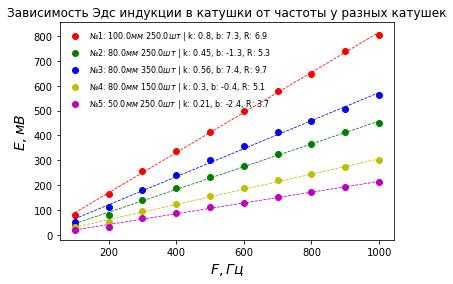

In [17]:
    color_map = ['r', 'g', 'b', 'y', 'm']
    
    for i in range(0, 5):
        plt.plot(x_vec, y_vecs[i], 'o', linewidth=0.8, c=color_map[i], label=str("№" + str(i+1) + ": " + str(coils_data["D"][i]) + "$мм$" + " " + str(coils_data["N"][i]) + "$шт$" + " | k: " + str(float(int(100*k[i]))/100.0) + ", b: " + str(float(int(10*b[i]))/10.0) + ", R: " + str(float(int(10*rsq[i]))/10.0) ))
        plt.plot(x_vec, b[i] + k[i] * x_vec, '--', c=color_map[i], linewidth=0.8)
    
    
    plt.xlabel("$F, Гц$", fontsize=14)
    plt.ylabel("$E, мВ$", fontsize=14)
    plt.title("Зависимость Эдс индукции в катушки от частоты у разных катушек", fontsize=12)
    
    plt.legend(loc=0, frameon=0, fontsize=8)
    
    plt.savefig("Result\ex3_gr1.pdf", dpi=300)
    plt.show()
    
    dic = {}
    
    dic.update({"k" : k})
    dic.update({"b" : b})
    dic.update({"r" : rsq})

Кофициент наклона кривых МНК в теории должны зависить от $N$ и $S$ и зная как, можно расчитать теоритическое значение этих кофициентов. Далее именно это я и делаю и сравниваю их с полученными:

In [18]:
    vs = []
    tk = []
    ttk = []
    
    for i in range(0, 5):
        vs.append(0.25 * np.pi * coils_data["D"][i] * coils_data["D"][i])
        tk.append( (4.0 * np.pi / 10000000) * vs[i] * 250 * coils_data["N"][i] / 430 )
        ttk.append(tk[i] / k[i])
    
    dic.update({"vs" : vs})
    dic.update({"tk" : tk})
    dic.update({"ttk" : ttk})
    
    to_file("Result\ex4_res1.txt", ["r", "b", "k", "tk", "ttk"], dic)
    
    for i in range(0, 5):
        print( "N=" + str(coils_data["N"][i]) + " D=" + str(coils_data["D"][i]) + "\t : \t" + str(tk[i]) + " \t~\t " + str(k[i]) + " \ttheory / experiment: " + str(tk[i]/k[i]) )

N=250.0 D=100.0	 : 	1.434535523414151 	~	 0.8086666666666664 	theory / experiment: 1.7739515953184066
N=250.0 D=80.0	 : 	0.9181027349850565 	~	 0.45915151515151503 	theory / experiment: 1.9995637707567893
N=350.0 D=80.0	 : 	1.285343828979079 	~	 0.5654545454545453 	theory / experiment: 2.273116096265253
N=150.0 D=80.0	 : 	0.550861640991034 	~	 0.30593939393939384 	theory / experiment: 1.800558057914434
N=250.0 D=50.0	 : 	0.35863388085353776 	~	 0.21721212121212116 	theory / experiment: 1.6510767394205843


### Видно, что теория +- сходится с эксперементом.